<a href="https://colab.research.google.com/github/jaimesilvads/Spark_min.io/blob/main/SparckComMio_Io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Usando Pyspark a/ processar dados de um data lake local (Min.io)   

### Importação das bibliotecas necessárias para o processamento

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

### configuração da sessão Spark

In [ ]:
spark = SparkSession \
    .builder \
    .appName("job-1-spark") \
    .config("spark.sql.warehouse.dir", abspath('spark-warehouse')) \
    .config("fs.s3a.endpoint", "http://127.0.0.1:9000") \
    .config("fs.s3a.access.key", "minioadmin")\
    .config("fs.s3a.secret.key", "minioadmin")\
    .config("fs.s3a.impl","org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .config("fs.s3a.path.style.access", "True")\
    .getOrCreate()


### definindo o método de logs da aplicação como INFO indicada em ambiente DEV opçoes[INFO,ERROR]

In [ ]:
spark.sparkContext.setLogLevel("INFO")

### Carregando os dados do nosso Data Lake

In [ ]:
df = spark.read.format("csv")\
    .option("header", "True")\
    .option("inferSchema","True")\
    .csv("s3a://ingestao/*.csv")

### imprime os dados lidos da zone de ingestao ou landing zone

In [ ]:
print (df.show())

+--------+--------+--------+-----+------+--------+--------+
|practice|bnf_code|bnf_name|items|   nic|act_cost|quantity|
+--------+--------+--------+-----+------+--------+--------+
|    5668|    8092|     592|    2|  44.1|   40.84|     189|
|    1596|   17512|   16983|    2|  1.64|    1.64|      35|
|    1596|   25587|   16124|    1|  1.26|    1.28|      42|
|    1596|   12551|    1282|    2|  0.86|    1.02|      42|
|    1596|   18938|   10575|    1|  1.85|    1.82|      56|
|    1596|    8777|   21507|    1|  3.31|    3.18|      56|
|    1596|    9369|   12008|    1| 63.15|   58.56|      56|
|    1596|   27926|   17643|    2|158.66|  147.07|      56|
|    1596|   26148|   10230|    1|  0.35|    0.44|      14|
|    1596|    9148|    3381|    1|  0.26|    0.35|       7|
|    1596|   19500|   18008|    1|  0.85|     0.9|      14|
|    1596|    5312|    2870|    1|  0.56|    0.63|      14|
|    1596|    5008|   15013|    1|  0.19|    0.29|       7|
|    1596|    2885|    1851|    2|  1.99

In [ ]:
print (df.show())

+--------+--------+--------+-----+------+--------+--------+
|practice|bnf_code|bnf_name|items|   nic|act_cost|quantity|
+--------+--------+--------+-----+------+--------+--------+
|    5668|    8092|     592|    2|  44.1|   40.84|     189|
|    1596|   17512|   16983|    2|  1.64|    1.64|      35|
|    1596|   25587|   16124|    1|  1.26|    1.28|      42|
|    1596|   12551|    1282|    2|  0.86|    1.02|      42|
|    1596|   18938|   10575|    1|  1.85|    1.82|      56|
|    1596|    8777|   21507|    1|  3.31|    3.18|      56|
|    1596|    9369|   12008|    1| 63.15|   58.56|      56|
|    1596|   27926|   17643|    2|158.66|  147.07|      56|
|    1596|   26148|   10230|    1|  0.35|    0.44|      14|
|    1596|    9148|    3381|    1|  0.26|    0.35|       7|
|    1596|   19500|   18008|    1|  0.85|     0.9|      14|
|    1596|    5312|    2870|    1|  0.56|    0.63|      14|
|    1596|    5008|   15013|    1|  0.19|    0.29|       7|
|    1596|    2885|    1851|    2|  1.99

### imprime o schema do dataframe

In [ ]:
print (df.printSchema())

root
 |-- practice: integer (nullable = true)
 |-- bnf_code: integer (nullable = true)
 |-- bnf_name: integer (nullable = true)
 |-- items: integer (nullable = true)
 |-- nic: double (nullable = true)
 |-- act_cost: double (nullable = true)
 |-- quantity: integer (nullable = true)

None


### Limpando os dados inválidos

In [ ]:
df.na.fill(value=0,subset=["quantity"]).show()

+--------+--------+--------+-----+------+--------+--------+
|practice|bnf_code|bnf_name|items|   nic|act_cost|quantity|
+--------+--------+--------+-----+------+--------+--------+
|    5668|    8092|     592|    2|  44.1|   40.84|     189|
|    1596|   17512|   16983|    2|  1.64|    1.64|      35|
|    1596|   25587|   16124|    1|  1.26|    1.28|      42|
|    1596|   12551|    1282|    2|  0.86|    1.02|      42|
|    1596|   18938|   10575|    1|  1.85|    1.82|      56|
|    1596|    8777|   21507|    1|  3.31|    3.18|      56|
|    1596|    9369|   12008|    1| 63.15|   58.56|      56|
|    1596|   27926|   17643|    2|158.66|  147.07|      56|
|    1596|   26148|   10230|    1|  0.35|    0.44|      14|
|    1596|    9148|    3381|    1|  0.26|    0.35|       7|
|    1596|   19500|   18008|    1|  0.85|     0.9|      14|
|    1596|    5312|    2870|    1|  0.56|    0.63|      14|
|    1596|    5008|   15013|    1|  0.19|    0.29|       7|
|    1596|    2885|    1851|    2|  1.99

### Convertendo para formato parquet

In [ ]:
df.write.format("parquet")\
        .mode("overwrite")\
        .save("s3a://processamento/df-formatado.parquet")

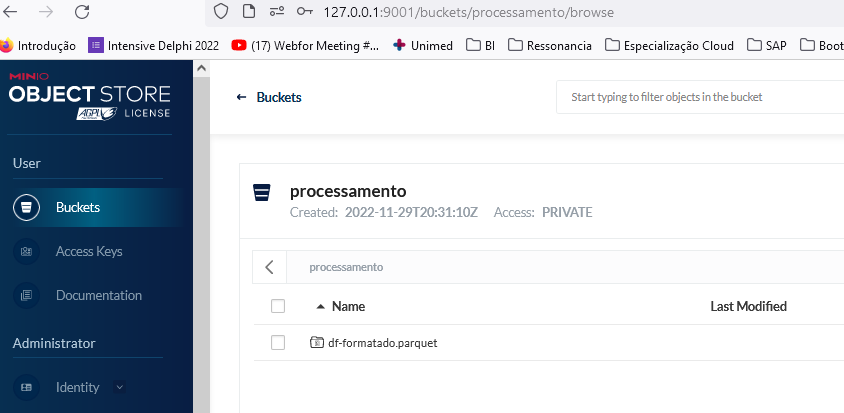

### Lendo o arquivos parquet para agregação de dados 

In [ ]:
df_parquet = spark.read.format("parquet")\
 .load("s3a://processamento/df-formatado.parquet")

In [ ]:
df_parquet.show()

+--------+--------+--------+-----+------+--------+--------+
|practice|bnf_code|bnf_name|items|   nic|act_cost|quantity|
+--------+--------+--------+-----+------+--------+--------+
|    3626|   12090|   20521|    3|   8.4|    7.82|     168|
|    3626|   23511|   11576|    1| 32.18|   29.81|      28|
|    3626|   14802|   14672|  162|141.13|  133.93|    4760|
|    3626|   14590|   10011|   17| 15.01|   14.12|     532|
|    3626|   24483|   13726|   69| 57.57|   54.67|    2121|
|    3626|    7768|   22070|  155|113.03|  109.41|    4144|
|    3626|    1877|   13598|  102|  68.5|    67.4|    2370|
|    3626|   18110|    3990|  189|156.66|  150.44|    5222|
|    3626|   14058|    2144|   23| 23.52|   22.48|     588|
|    3626|    4558|    5695|   32|116.64|  109.21|     756|
|    3626|    2851|     471|   97| 73.44|   71.92|    2387|
|    3626|   20025|   21500|    2|   9.4|    8.74|     112|
|    3626|   19371|   19847|    1|   5.9|    5.48|      28|
|    3626|   21630|      92|    1|  11.8

### cria uma view para trabalhar com sql

In [ ]:
df_parquet.createOrReplaceTempView("Dados_Sql")

### processa os dados conforme regra de negócio

In [ ]:
df_sql = spark.sql("SELECT BNF_CODE as Bnf_code \
                       ,SUM(ACT_COST) as Soma_cost \
                       ,SUM(QUANTITY) as Soma_Quantidade \
                       ,SUM(ITEMS) as Soma_items \
                       ,AVG(ACT_COST) as Media_cost \
                      FROM Dados_Sql \
                      GROUP BY bnf_code")

In [ ]:
df_sql.show()

+--------+------------------+---------------+----------+------------------+
|Bnf_code|         Soma_cost|Soma_Quantidade|Soma_items|        Media_cost|
+--------+------------------+---------------+----------+------------------+
|   18498| 8207199.779999969|         106187|    106027|248.08656610845682|
|   10206|219693.79999999958|       12782800|     16820| 18.40289830792424|
|    9376| 1087589.389999999|        4318883|     92483|  27.2544641022428|
|    8389| 2698243.509999993|       23799280|   1821517| 27.94890835076954|
|    7253|2863514.2799999868|       35613466|    691374|34.203467271858415|
|   16861|256968.39000000124|        5203705|    109860| 8.069854913167768|
|   11141| 293024.8499999999|         236990|      2786|129.71440903054446|
|   24347| 75200.45999999998|         231374|      5807|18.133701470942846|
|    5803| 80253.61999999998|          18915|      1384| 82.31140512820511|
|    7982|         137102.66|           8936|      4039|41.445785973397825|
|   23271|  

In [ ]:
df_sql.write.format("parquet")\
            .mode("overwrite")\
            .save("s3a://servico/df-Dados-Agregados.parquet")

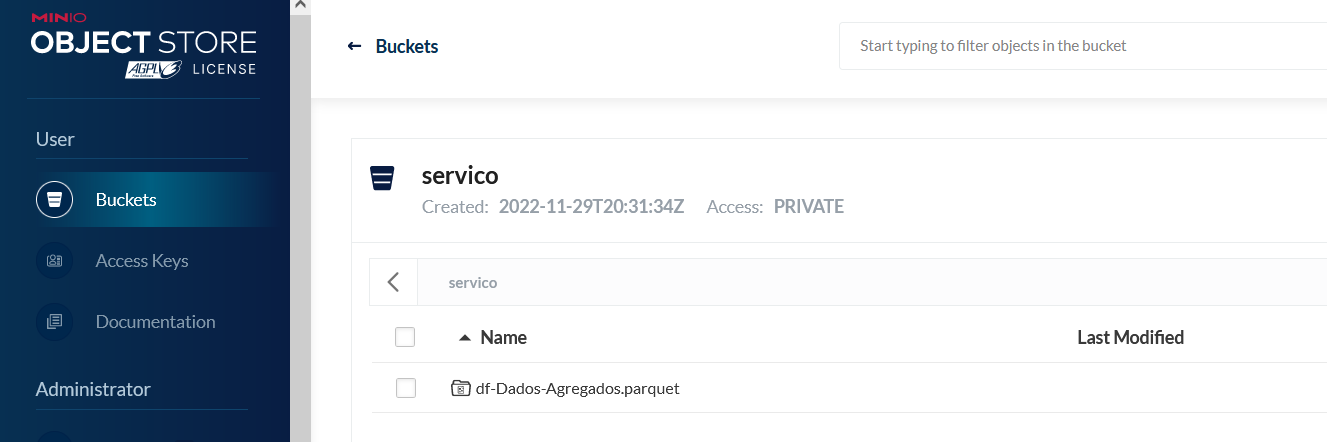